In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors
from matplotlib.colors import ListedColormap

In [2]:
df_results = pyam.IamDataFrame('../../../data/TOD/model_results/to_share/model_results_to_share.xlsx')
df_results

[INFO] 11:04:47 - pyam.core: Reading file ..\..\..\data\TOD\model_results\to_share\model_results_to_share.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Air_Pollution, Biodiversity, Climate, Emissions, ... Water (12)
 * scenario : LIFE-TP, REF, TECH-TP (3)
Timeseries data coordinates:
   region   : Africa (UN-R5), Asia and the Pacific (UN-R5), ... World (6)
   variable : Agricultural Demand, Agricultural Demand|Crops, ... Yield|Cereal (208)
   unit     : %, % of GDP, EJ/yr, GtC, Mt BC/yr, Mt CH4/yr, ... µg/m3 (35)
   year     : 2000, 2010, 2020, 2030, 2040, 2050 (6)

In [3]:
df_bio = pyam.read_iiasa(
    'geo7_internal',
    scenario=['REF-v2', 'TECH-TP-v2', 'LIFE-TP-v2'],
    region=[
        'Africa (UN-R5)',
        'Asia and the Pacific (UN-R5)',
        'Eastern Europe (UN-R5)',
        'Latin America and Caribbean (UN-R5)',
        'Western Europe and Other States (UN-R5)',
        'World',],
    variable=[
        'Terrestrial Biodiversity|MSA Loss|Encroachment',
        'Terrestrial Biodiversity|MSA Loss|Fragmentation',
        'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
        'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
        'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
    ],
    model='IMAGE-GLOBIO 3.3'
                    )
df_bio = df_bio.rename(scenario={
    'REF-v2':'REF', 
    'TECH-TP-v2':'TECH-TP', 
    'LIFE-TP-v2':'LIFE-TP'})
df_results = pyam.concat([df_results, df_bio])

[INFO] 11:04:54 - ixmp4.conf.settings: Connecting as user 'stephenmaycock'.
[INFO] 11:04:55 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 11:04:55 - pyam.iiasa: You are connected as user `stephenmaycock`


Land Cover


Agricultural Demand
Terrestrial Biodiversity Loss
Primary Energy w/ CCS
Primary Energy


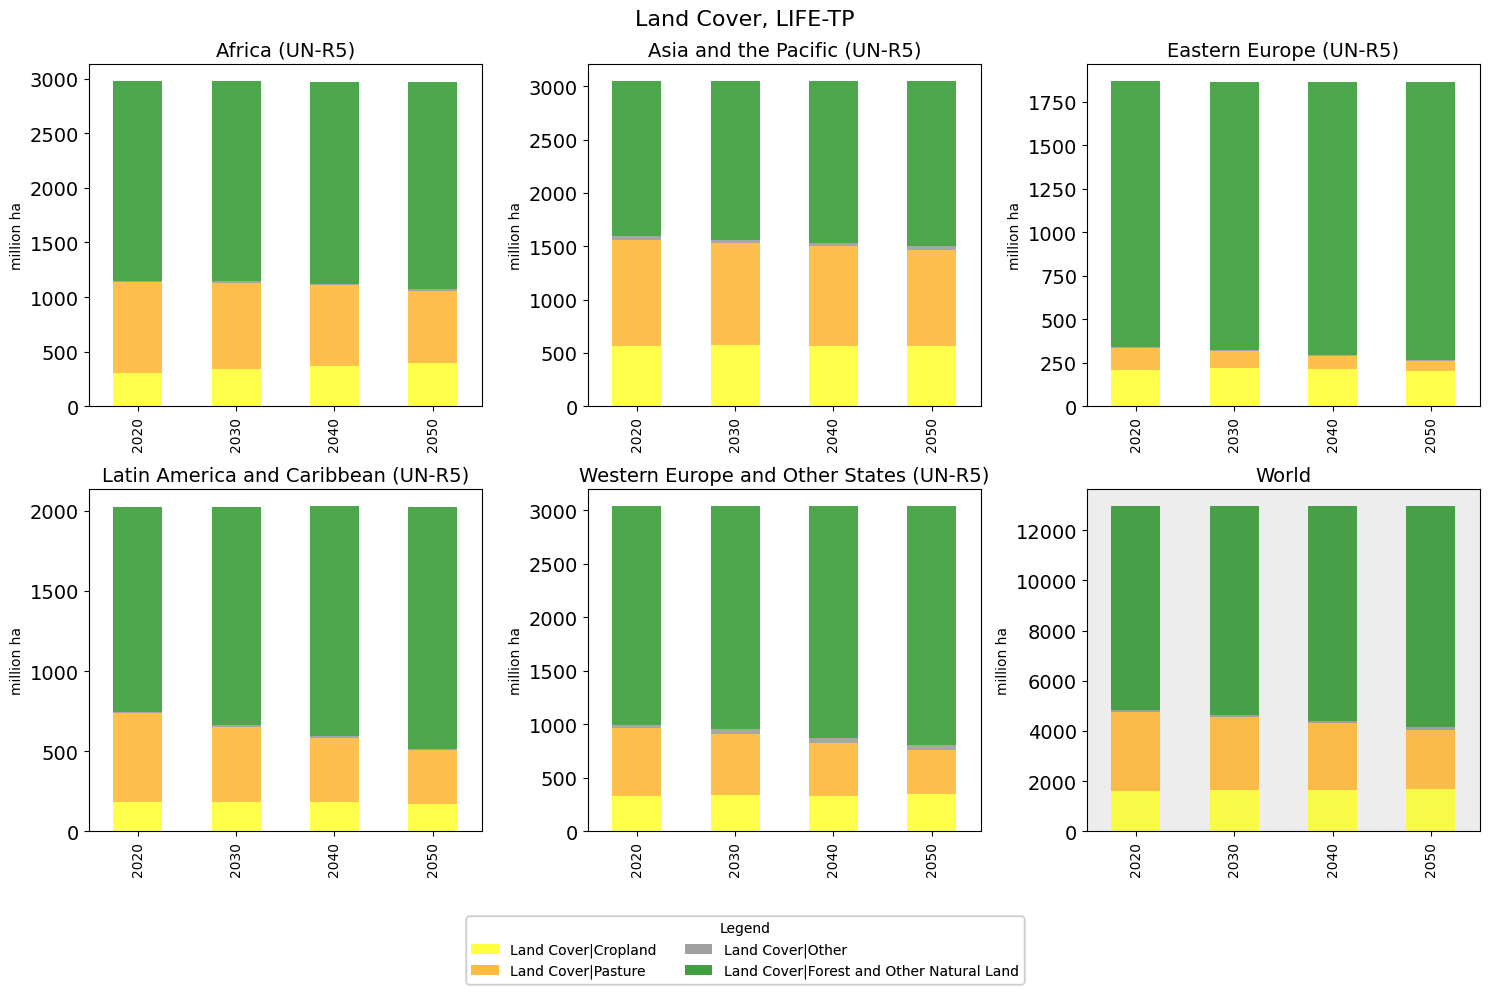

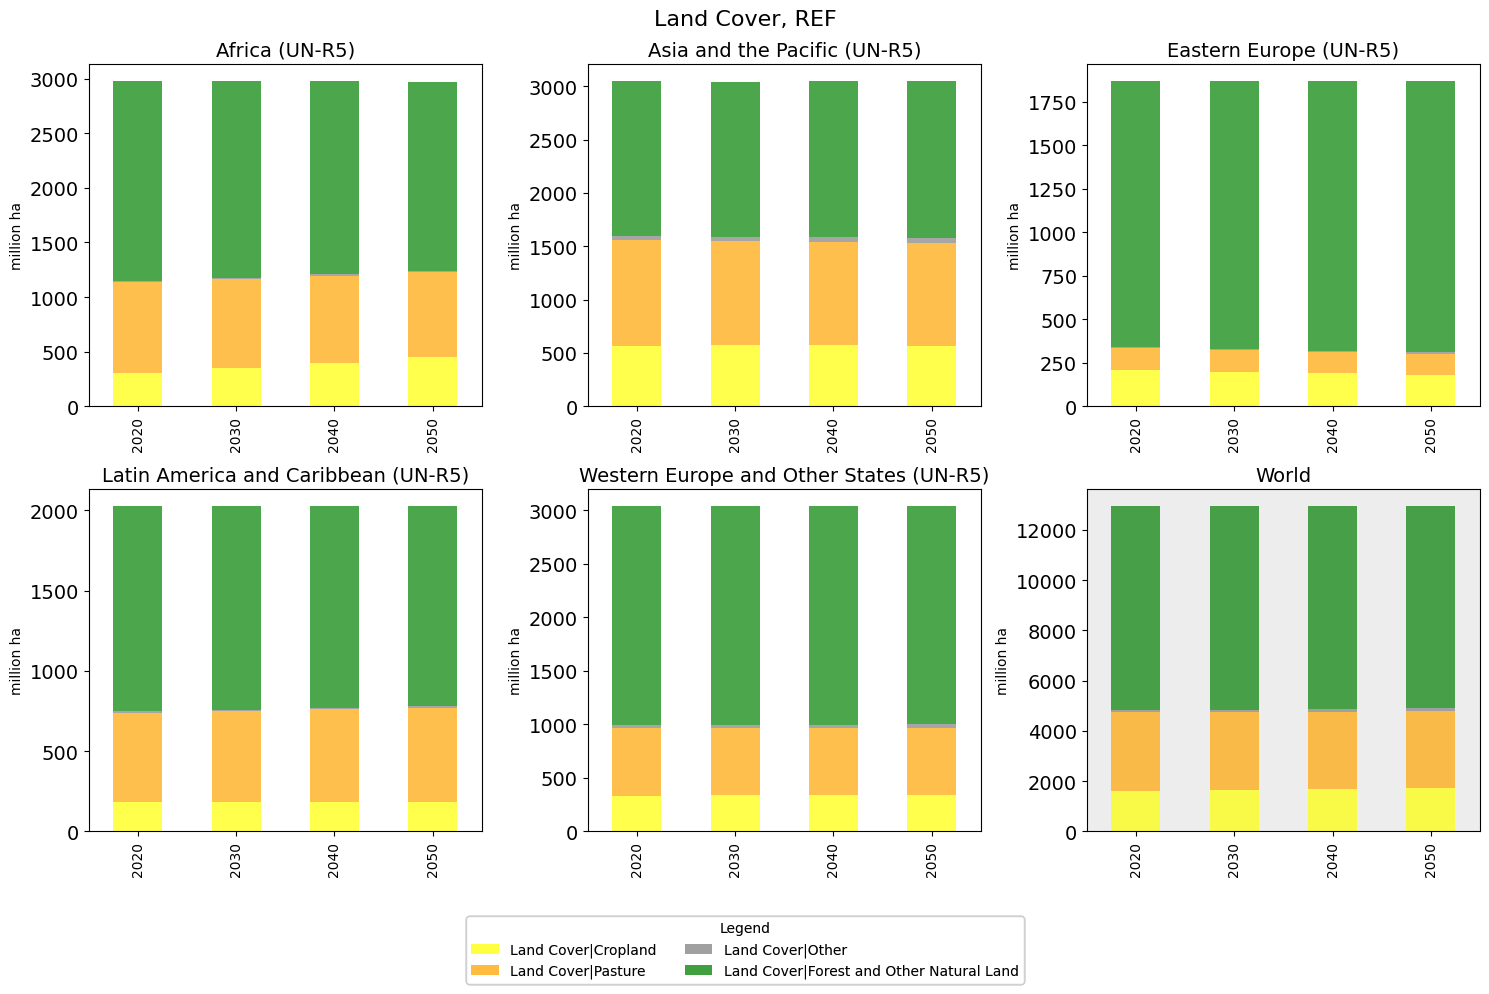

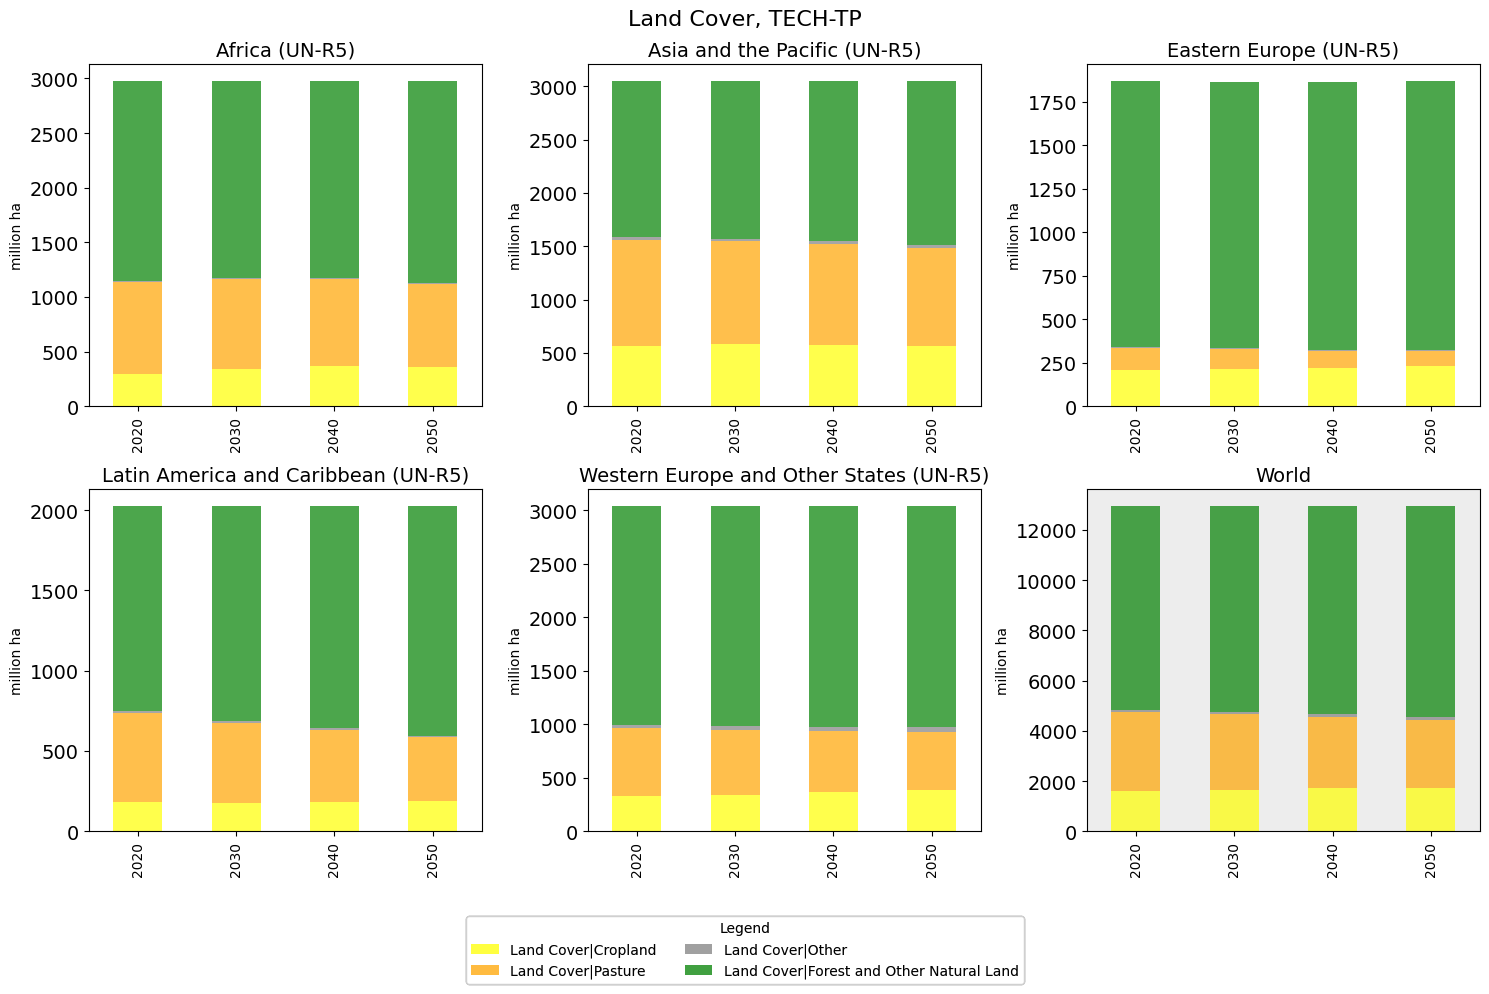

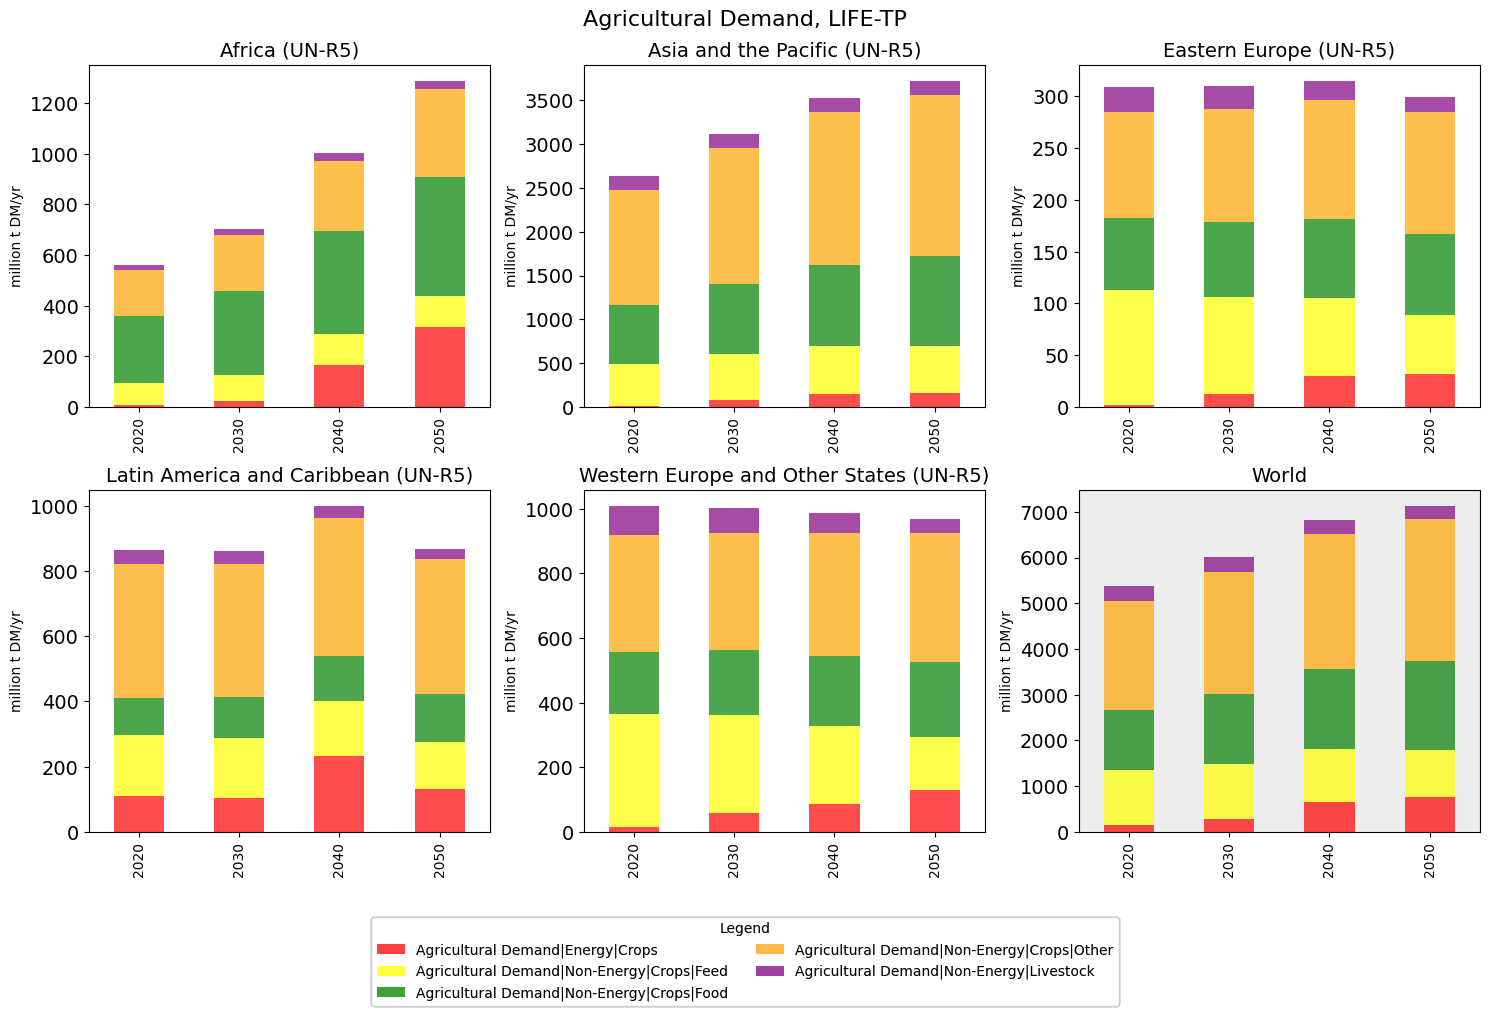

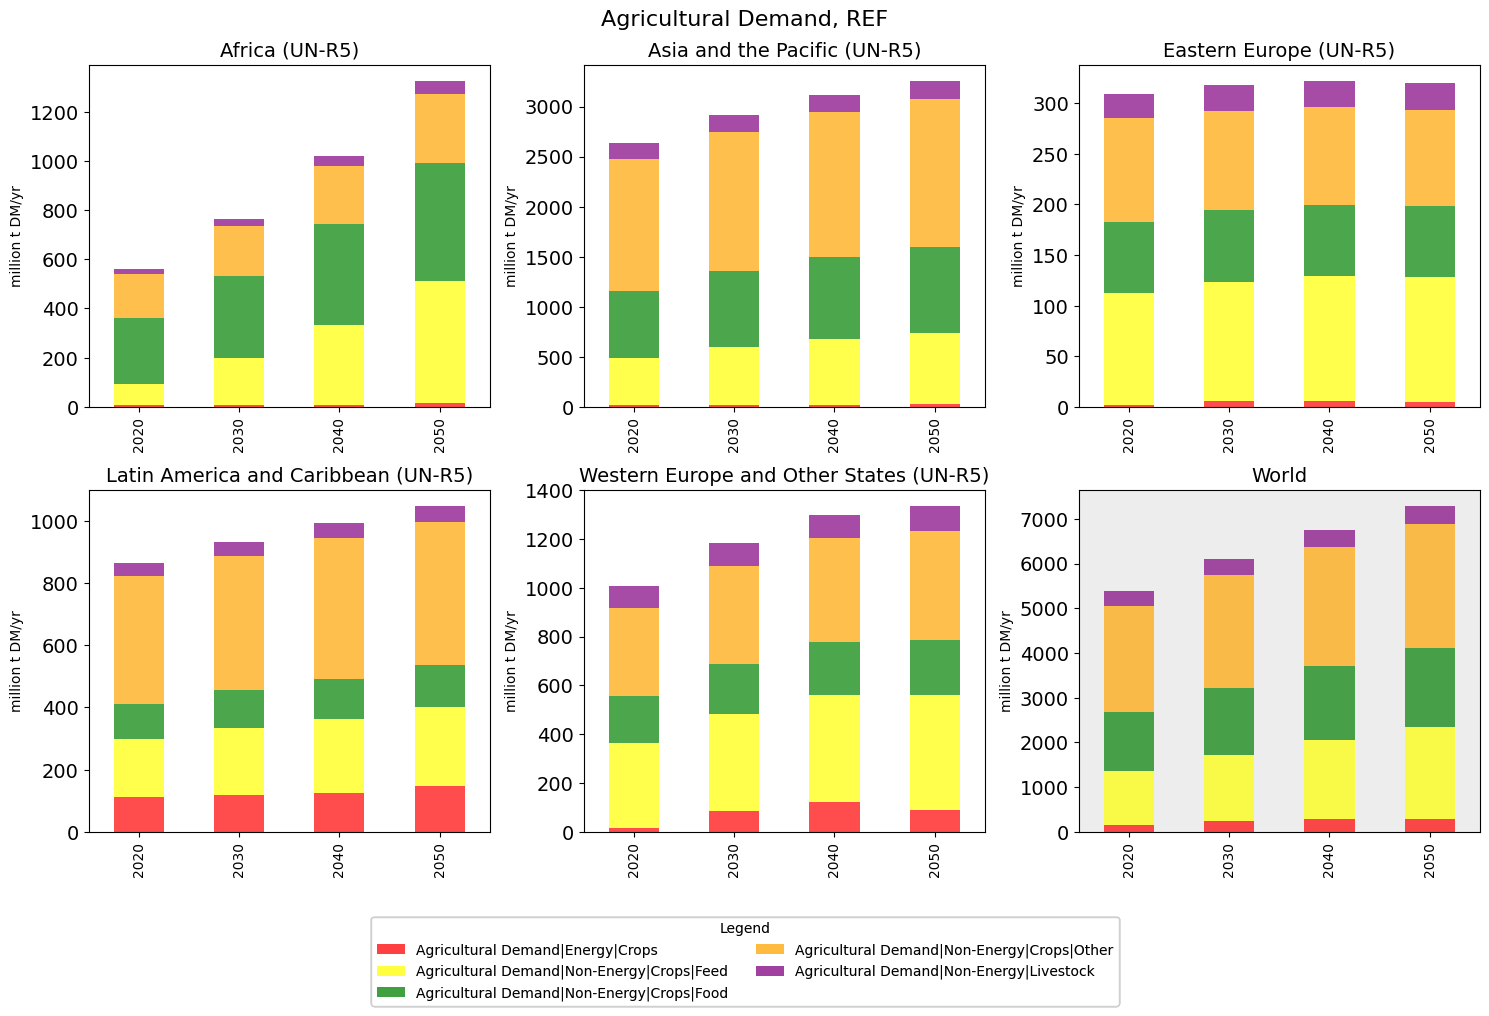

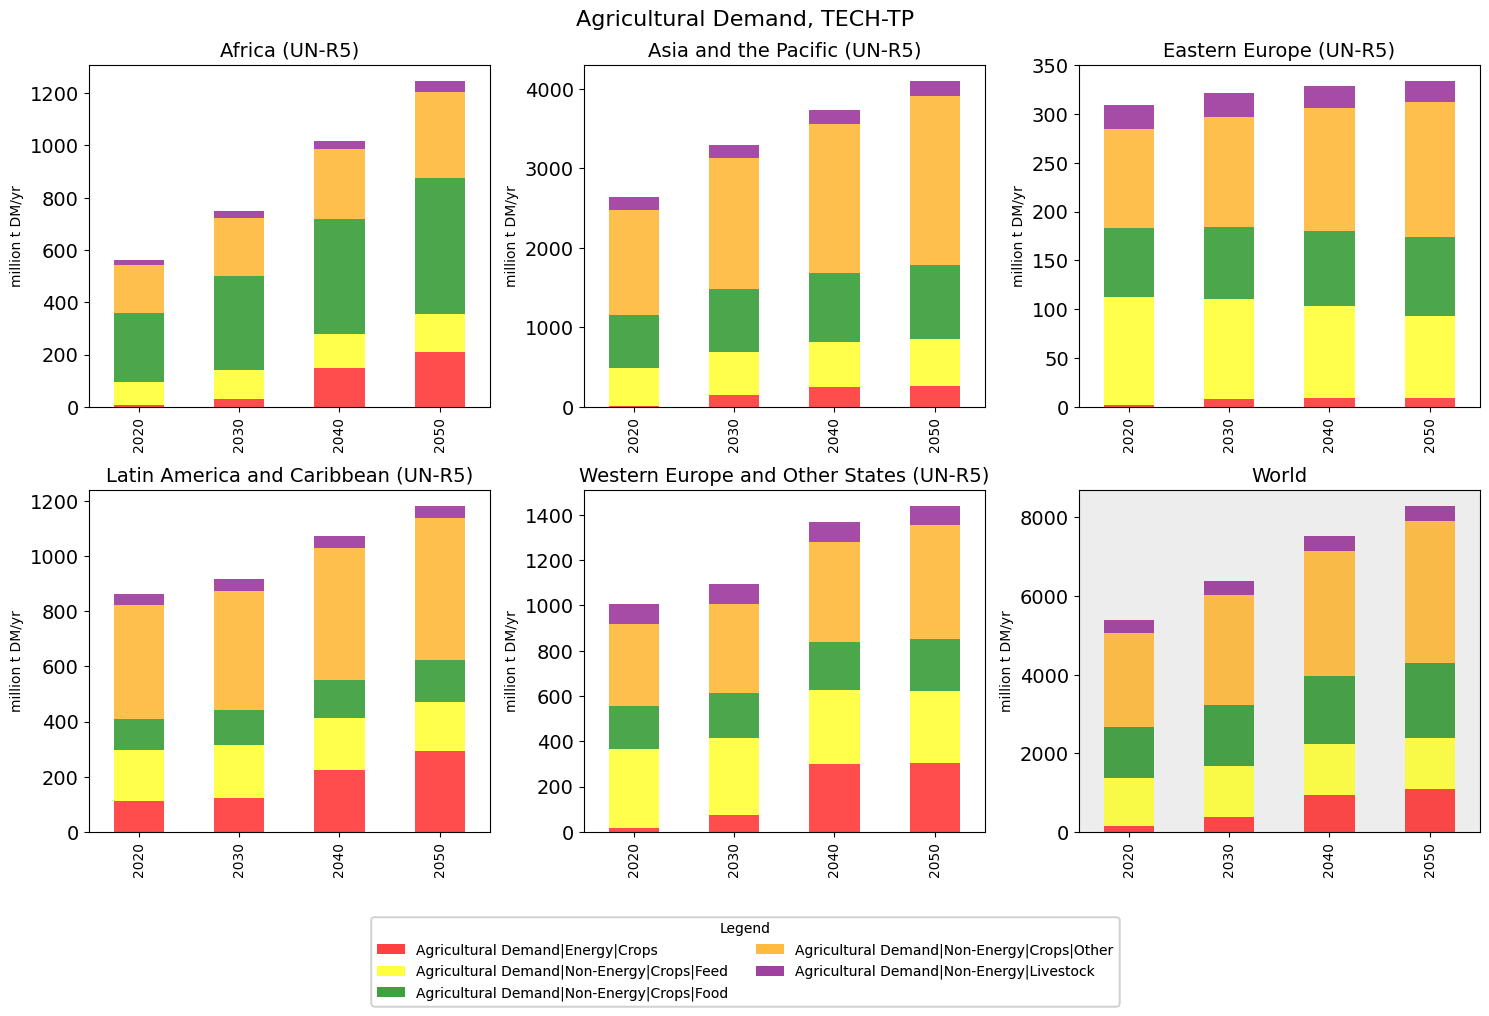

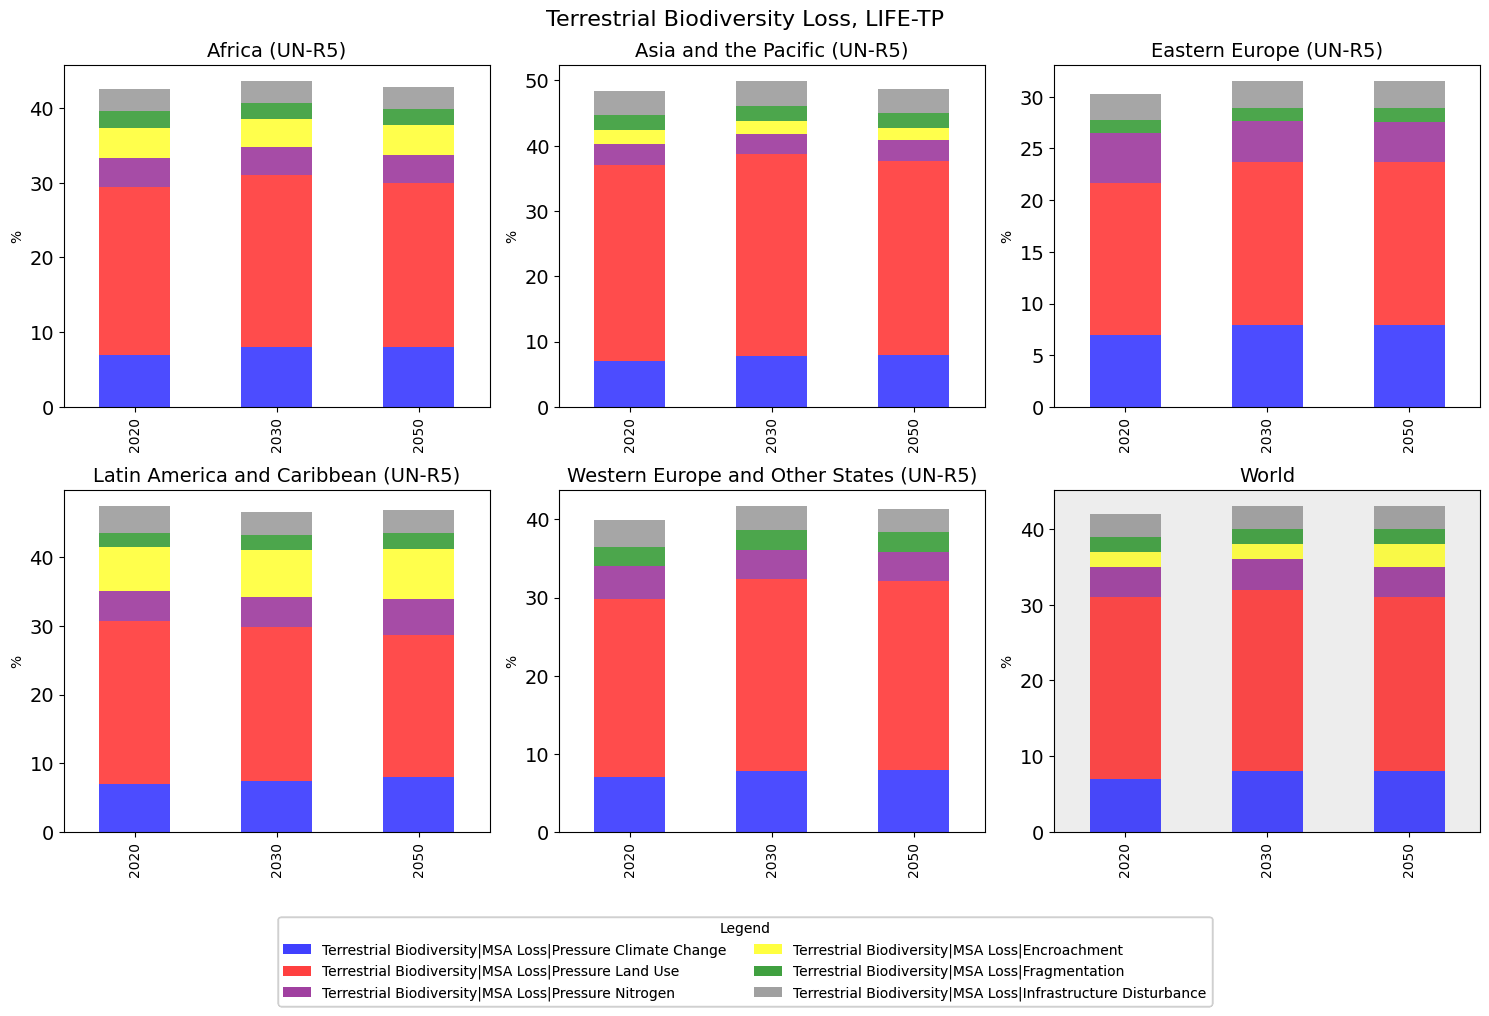

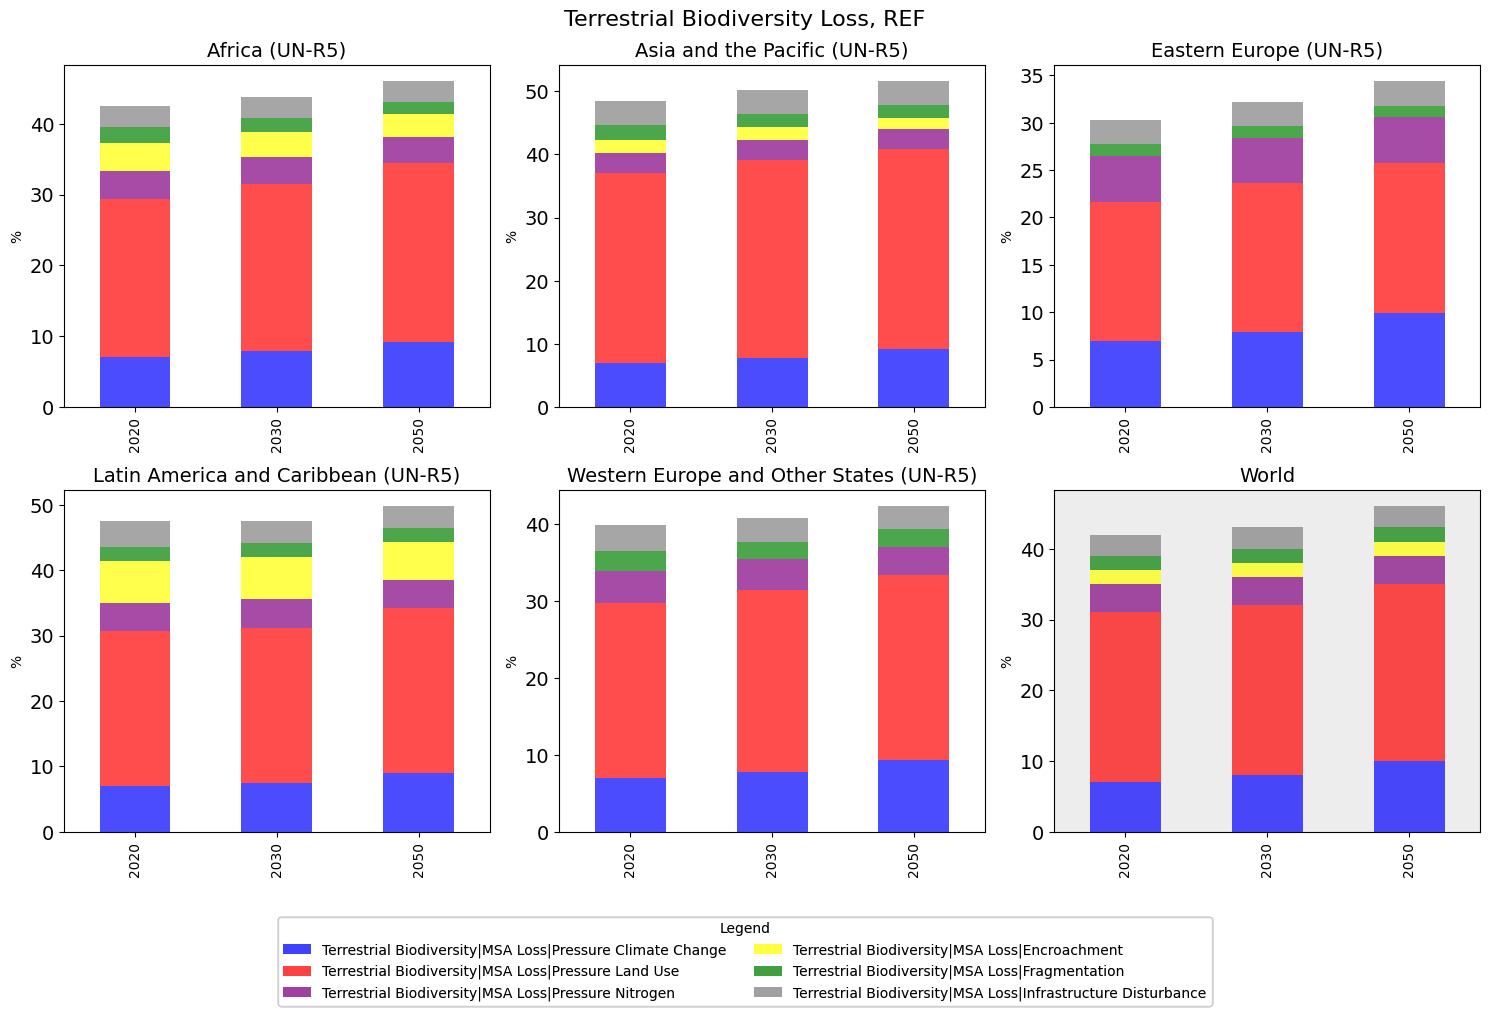

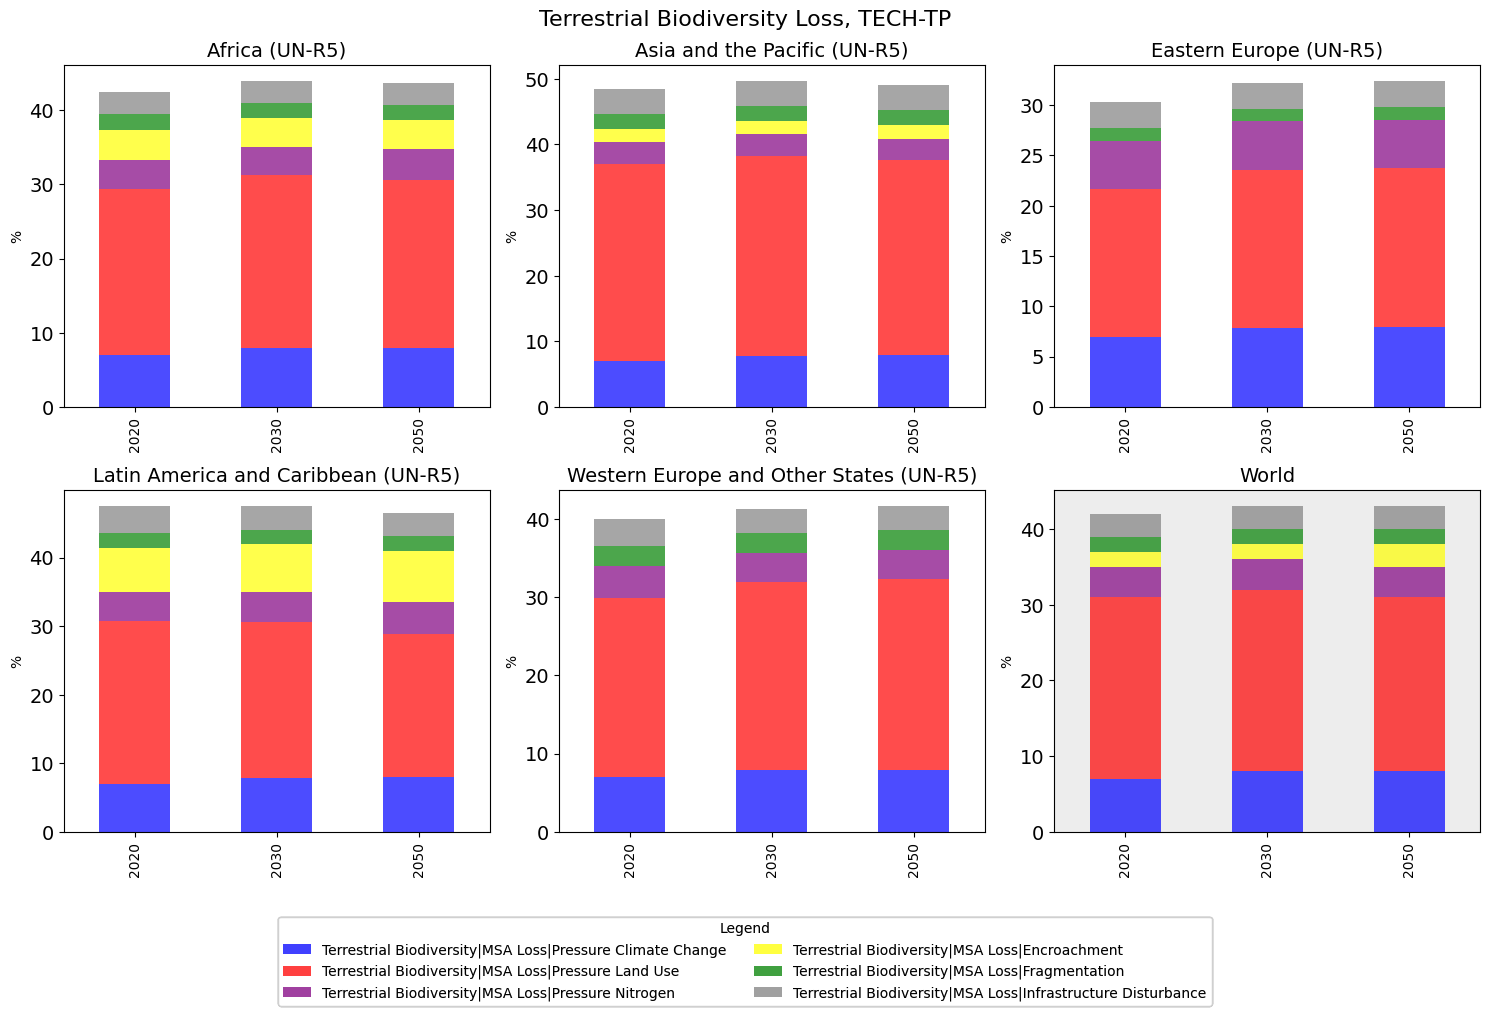

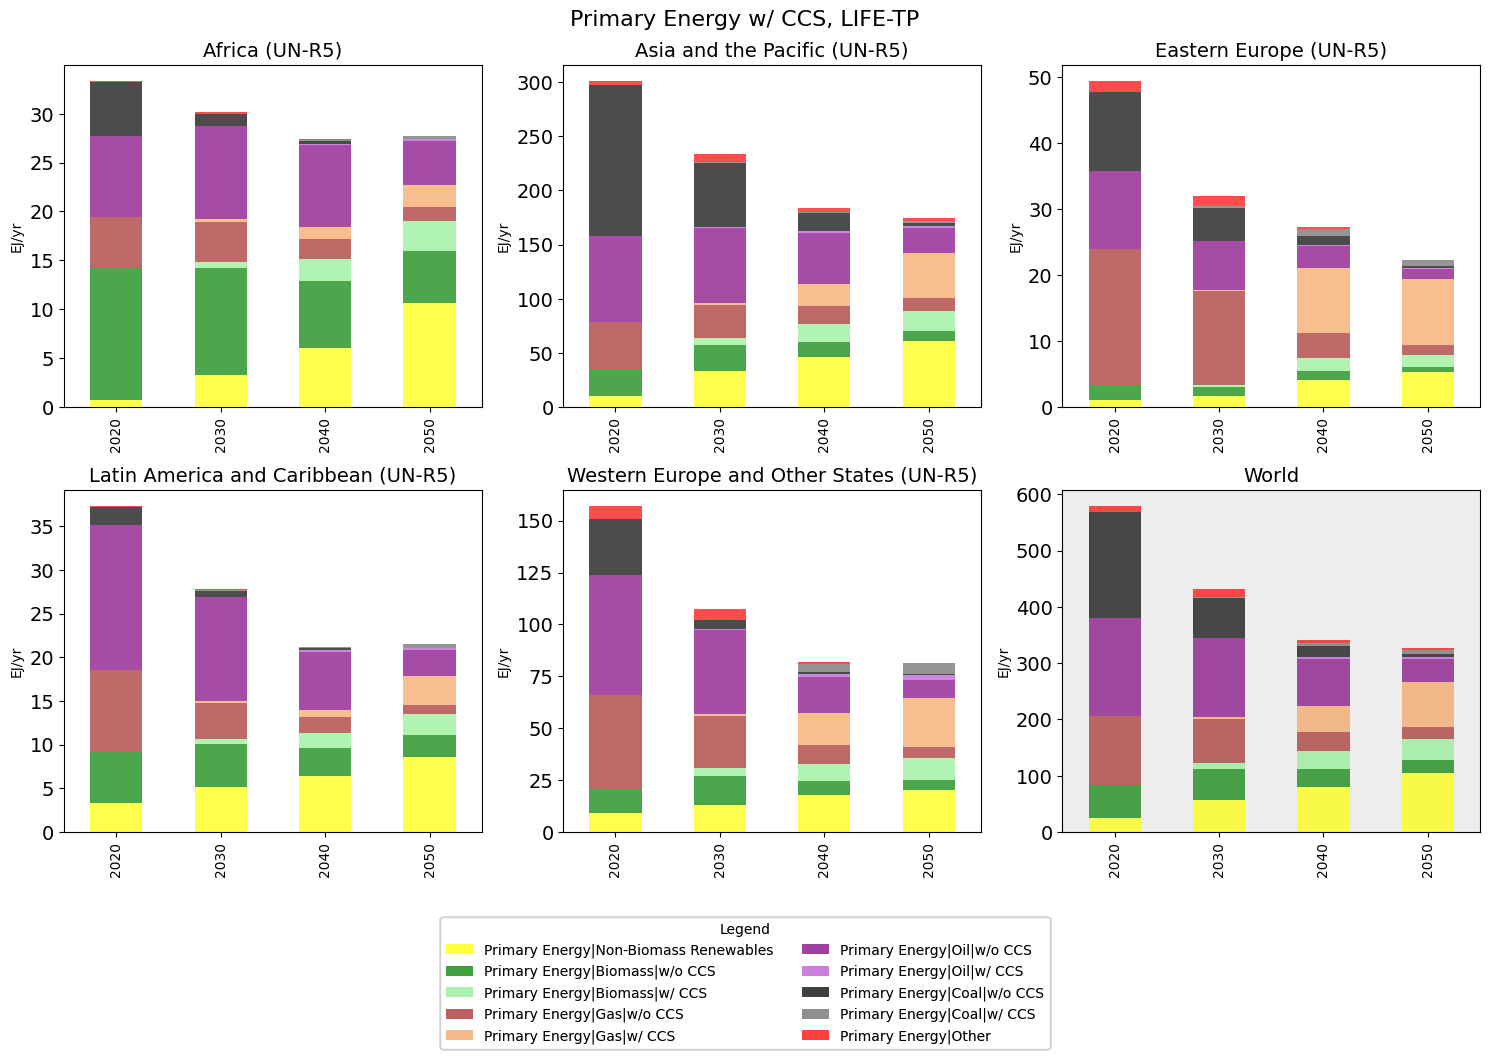

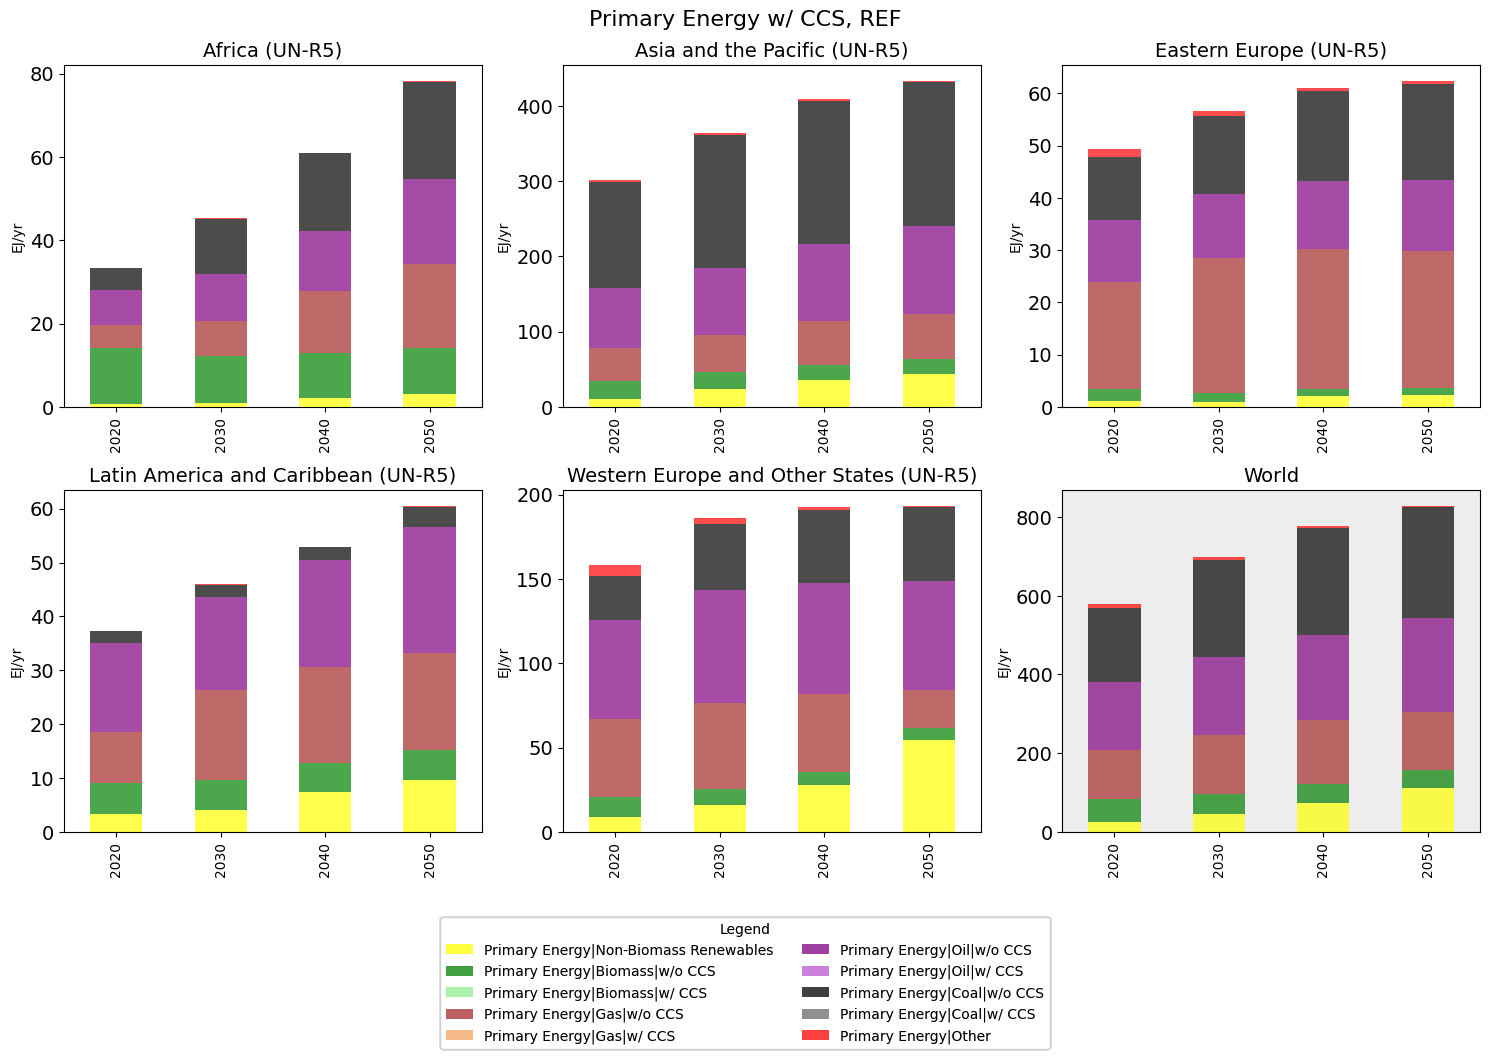

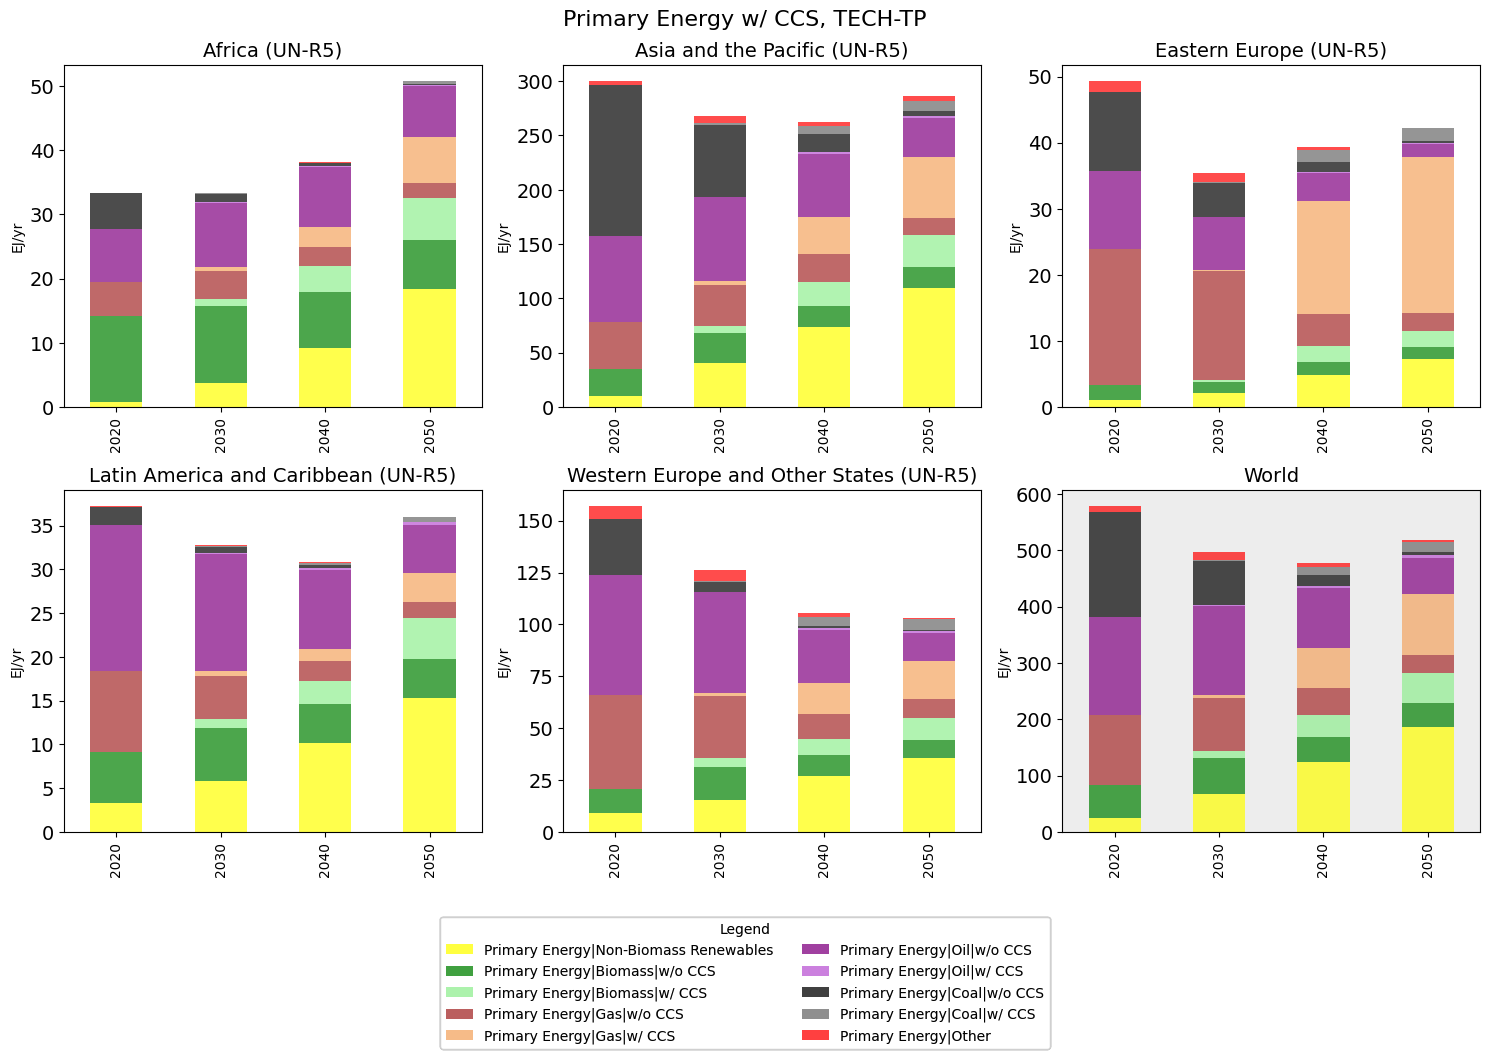

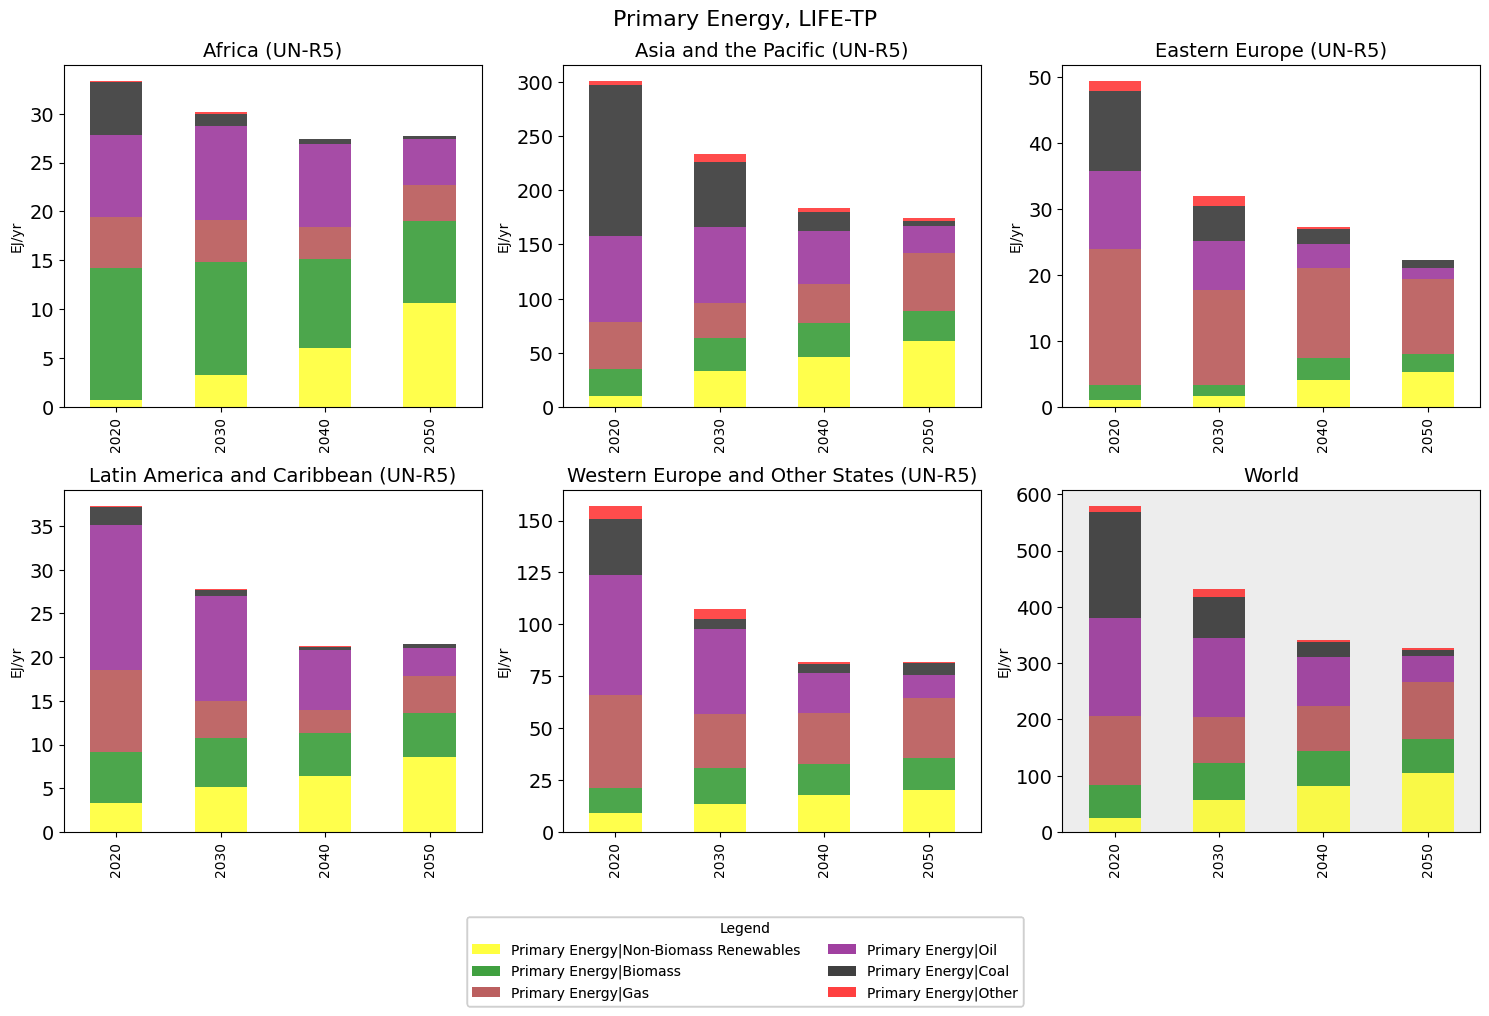

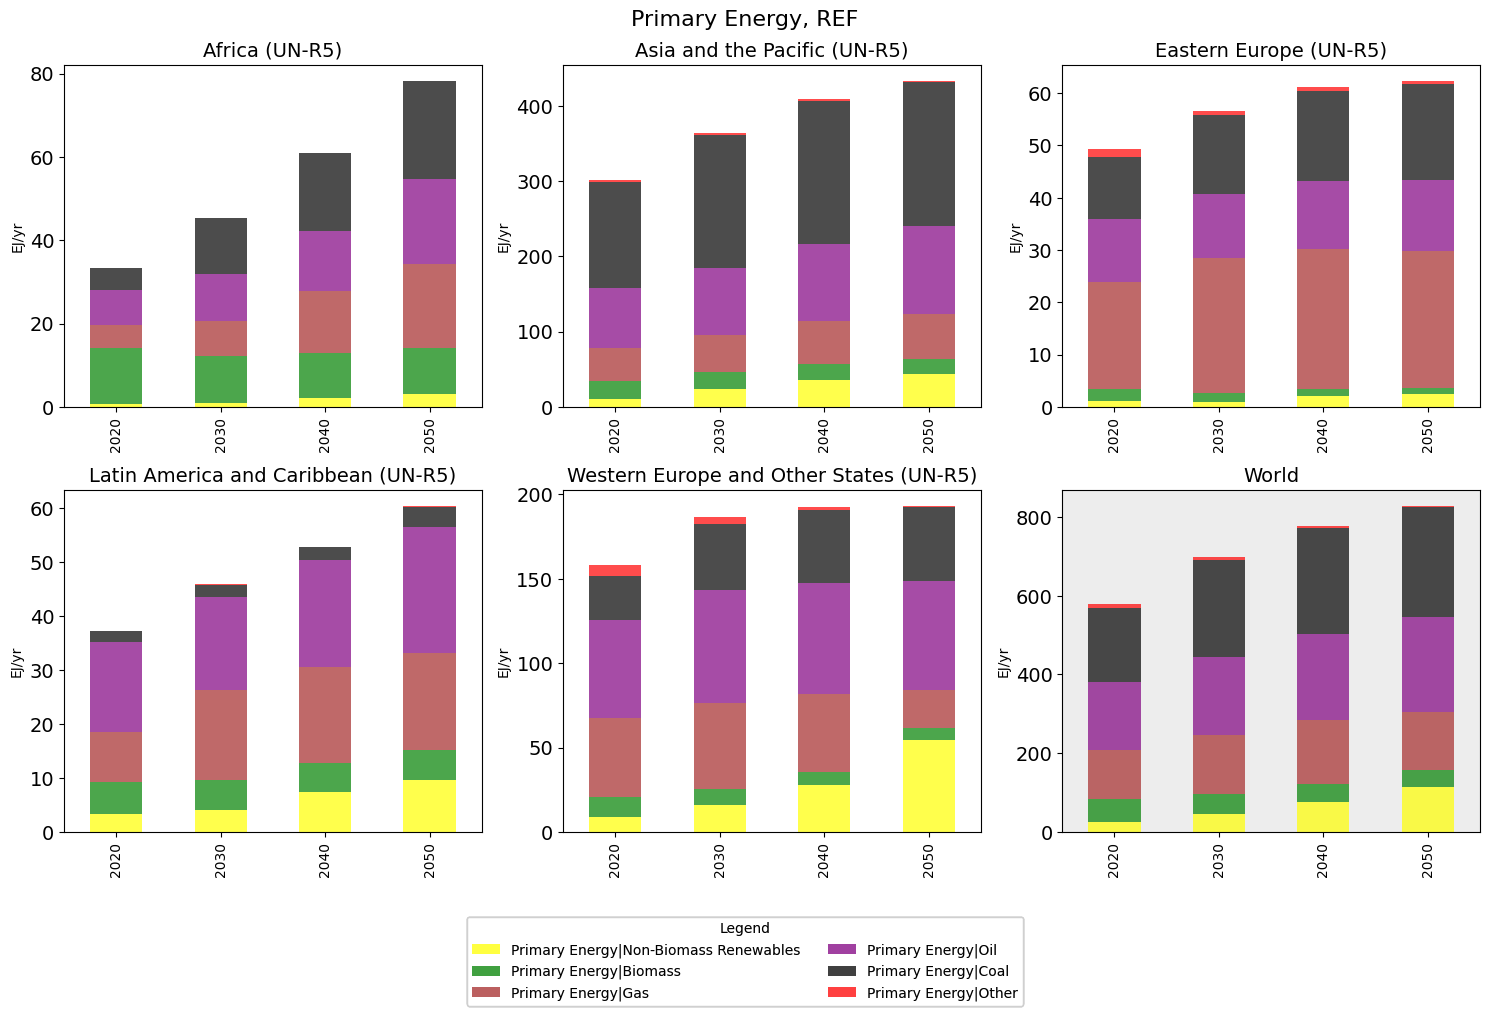

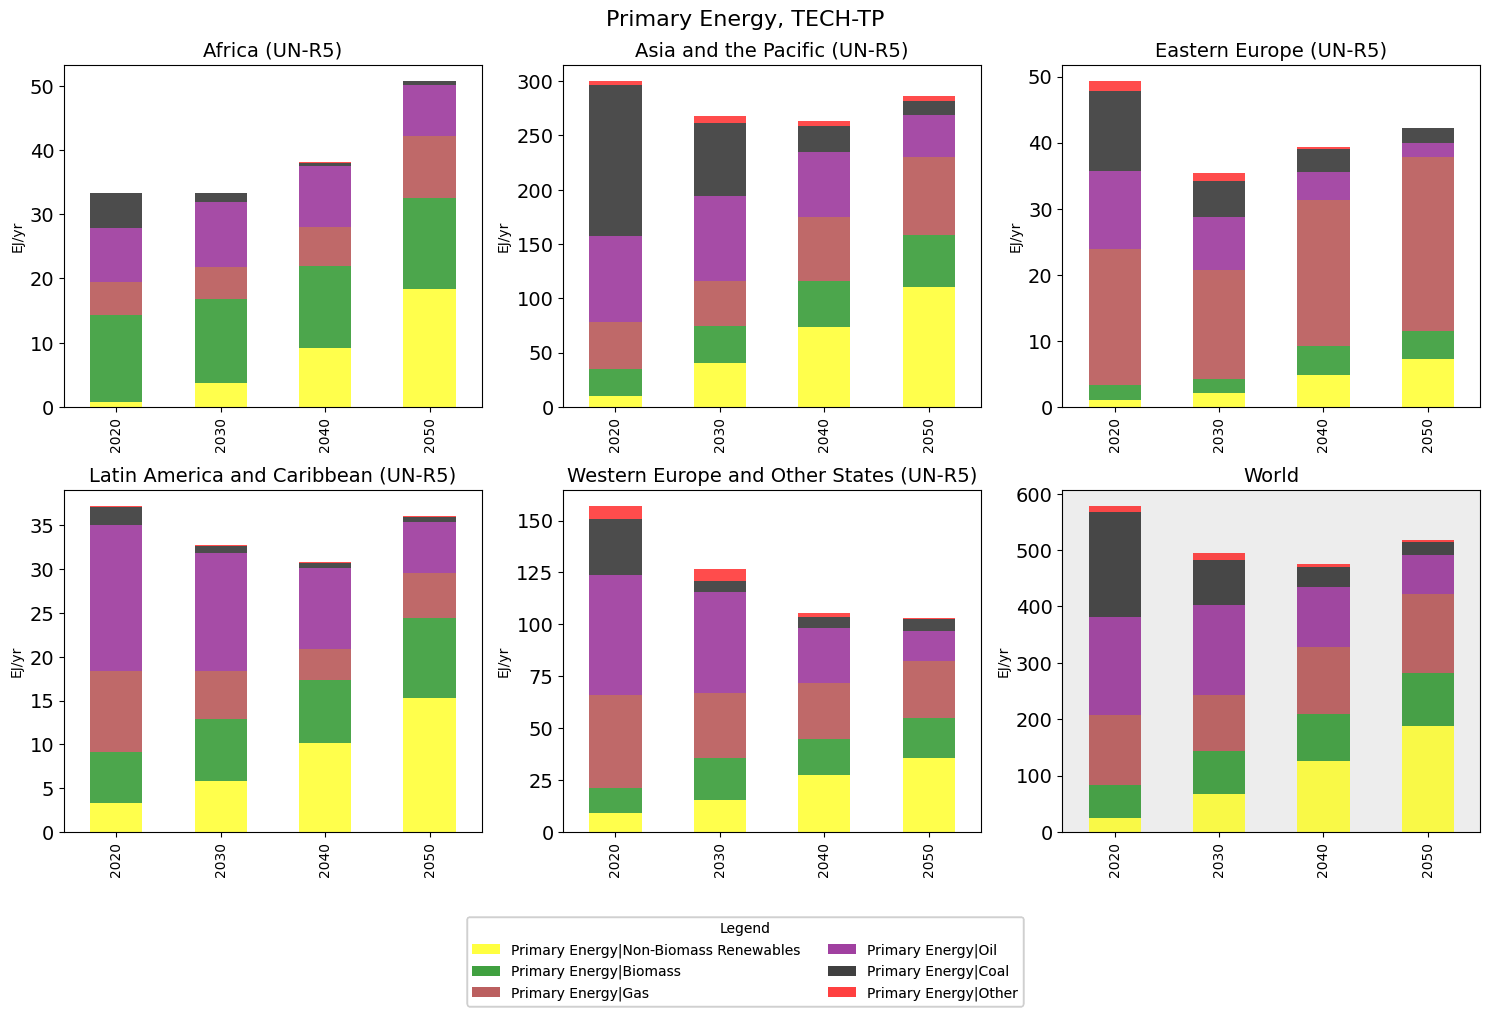

In [4]:
variable_dict ={
    'Land Cover':[[
        "Land Cover|Cropland",
        "Land Cover|Pasture",
        "Land Cover|Other",
        "Land Cover|Forest and Other Natural Land",
    ], ['yellow', 'orange', 'grey', 'green']],
    'Agricultural Demand':[[
        'Agricultural Demand|Energy|Crops',
        'Agricultural Demand|Non-Energy|Crops|Feed',
        'Agricultural Demand|Non-Energy|Crops|Food',
        'Agricultural Demand|Non-Energy|Crops|Other',
        'Agricultural Demand|Non-Energy|Livestock',
    ], ['red', 'yellow', 'green', 'orange', 'purple']],
    'Terrestrial Biodiversity Loss':[[
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
        'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
        'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
        'Terrestrial Biodiversity|MSA Loss|Encroachment',
        'Terrestrial Biodiversity|MSA Loss|Fragmentation',
        'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
    ], ['blue', 'red', 'purple', 'yellow', 'green', 'grey']],
    'Primary Energy w/ CCS':[[
        'Primary Energy|Non-Biomass Renewables',
        'Primary Energy|Biomass|w/o CCS',
        'Primary Energy|Biomass|w/ CCS',
        'Primary Energy|Gas|w/o CCS',
        'Primary Energy|Gas|w/ CCS',
        'Primary Energy|Oil|w/o CCS',
        'Primary Energy|Oil|w/ CCS',
        'Primary Energy|Coal|w/o CCS',
        'Primary Energy|Coal|w/ CCS',
        'Primary Energy|Other',
    ], ['yellow', 'green', 'lightgreen', 'brown', 'sandybrown', 'purple', 'mediumorchid', 'black', 'dimgrey', 'red', ]],
    'Primary Energy':[[
        'Primary Energy|Non-Biomass Renewables',
        'Primary Energy|Biomass',
        'Primary Energy|Gas',
        'Primary Energy|Oil',
        'Primary Energy|Coal',
        'Primary Energy|Other',
    ], ['yellow', 'green', 'brown', 'purple', 'black', 'red']]
}

for variable in variable_dict.keys():
    print(variable)
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_results.filter(variable=variable_dict[variable][0], year=[2020, 2030, 2040, 2050])
    
    # Define the color palette for scenarios
    colors = variable_dict[variable][1]
    cmap = ListedColormap(colors, name='custom_cmap')

    unique_regions = geo_data.region
    for scenario in geo_data.scenario:
        # Iterate through each region and plot in respective subplot
        # Create subplots based on the number of unique regions
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

        # Initialize lists to store handles and labels for the legend
        legend_handles = []
        legend_labels = []

        for idx, region in enumerate(unique_regions):
            row_idx = idx // 3
            col_idx = idx % 3
            
            ax = axes[row_idx, col_idx]  # Select the current subplot
            
            region_data = geo_data.filter(region=region, scenario=scenario)  # Filter data for the current region
            
            # Plot lineplots for each region
            region_data.plot.bar(stacked=True, 
                                 bars_order=variable_dict[variable][0], 
                                 cmap=cmap, 
                                 alpha=0.7, 
                                 ax=ax)
            
            # Customize ticks and labels for the current subplot
            ax.set_xlabel('', fontsize=1)
            ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
            
            # Increase fontsize of y-axis tick labels
            ax.tick_params(axis='y', labelsize=14)
            ax.legend().set_visible(False)


            fig.suptitle(f"{variable}, {scenario}", fontsize=16)
            handles, labels = ax.get_legend_handles_labels()
            fig.legend(handles, labels, loc="upper center", title="Legend", bbox_to_anchor=(0.5, -0.02), ncol=2)

            plt.tight_layout()  # Adjust subplots to prevent overlap

            # Add a gray background for the 'World' region subplot
            if region == 'World':
                ax.set_facecolor(color='#ededed')

            root_variable = variable.split("|")[0].replace(" ", "_")
            variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
            plt.savefig(f"../../../plots/TOD/systems/{variable_name}_{scenario}.png", bbox_inches='tight')
            # plt.close()

# World only

Land Cover
Agricultural Demand
Terrestrial Biodiversity Loss
Primary Energy w/ CCS
Primary Energy


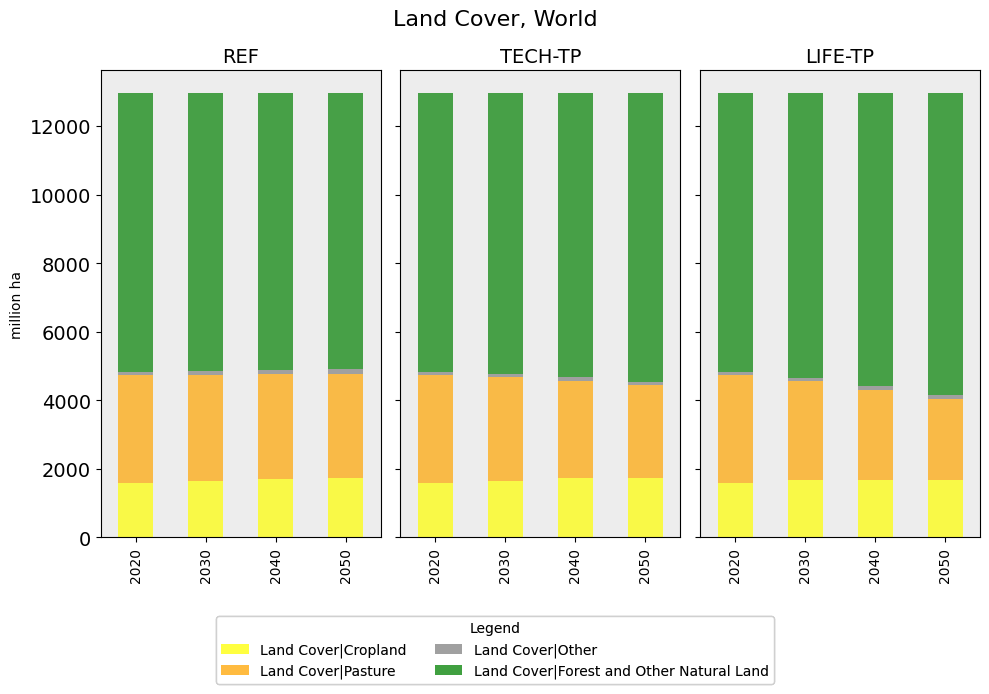

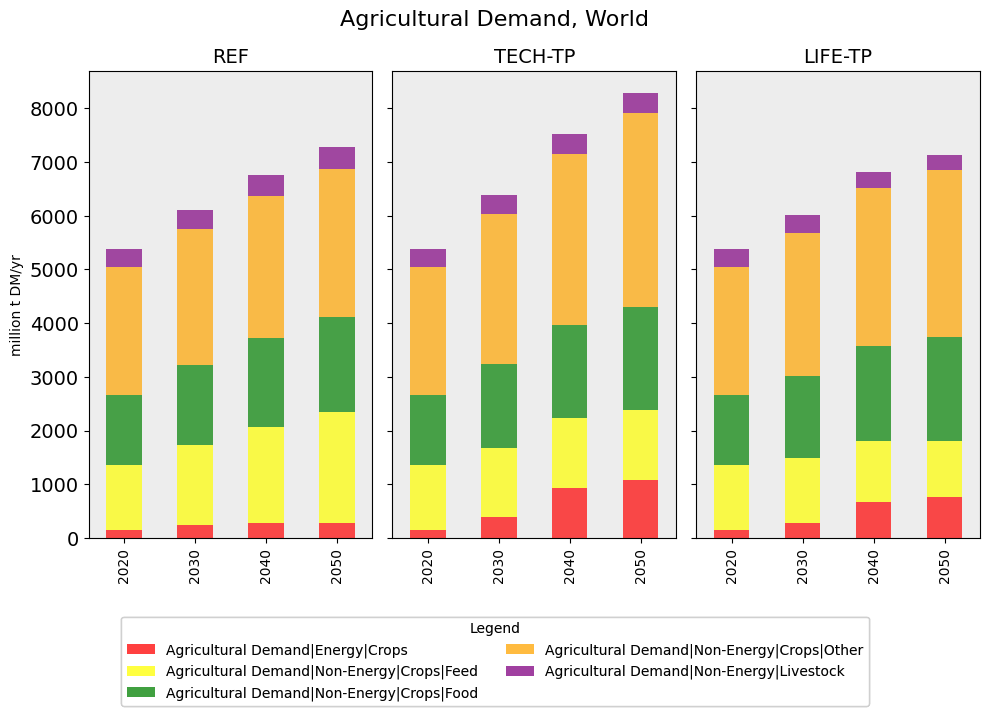

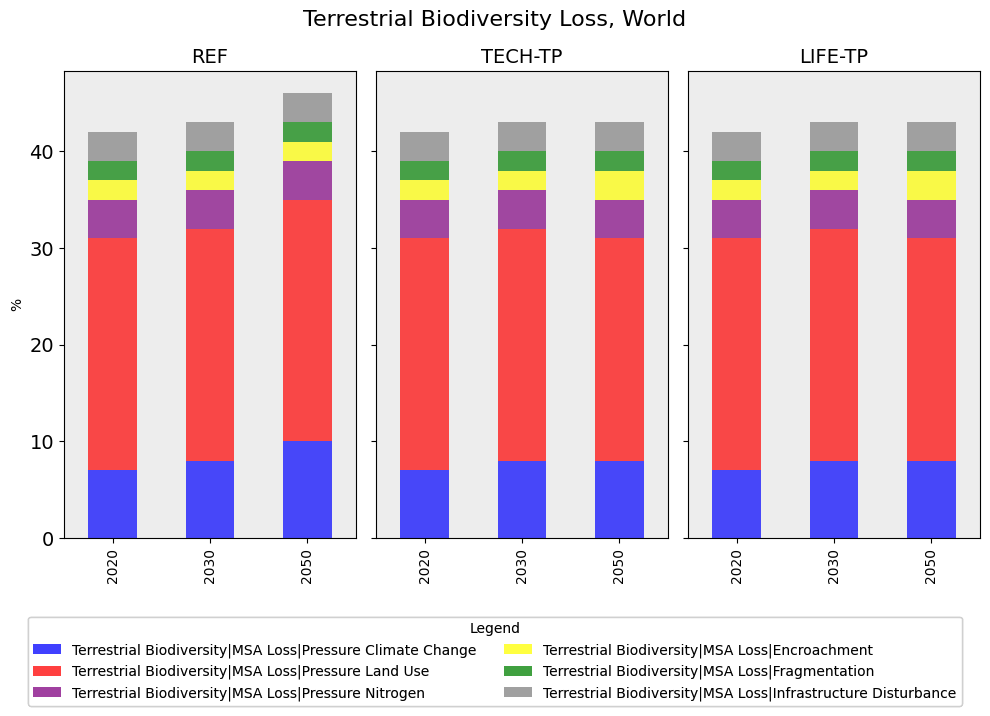

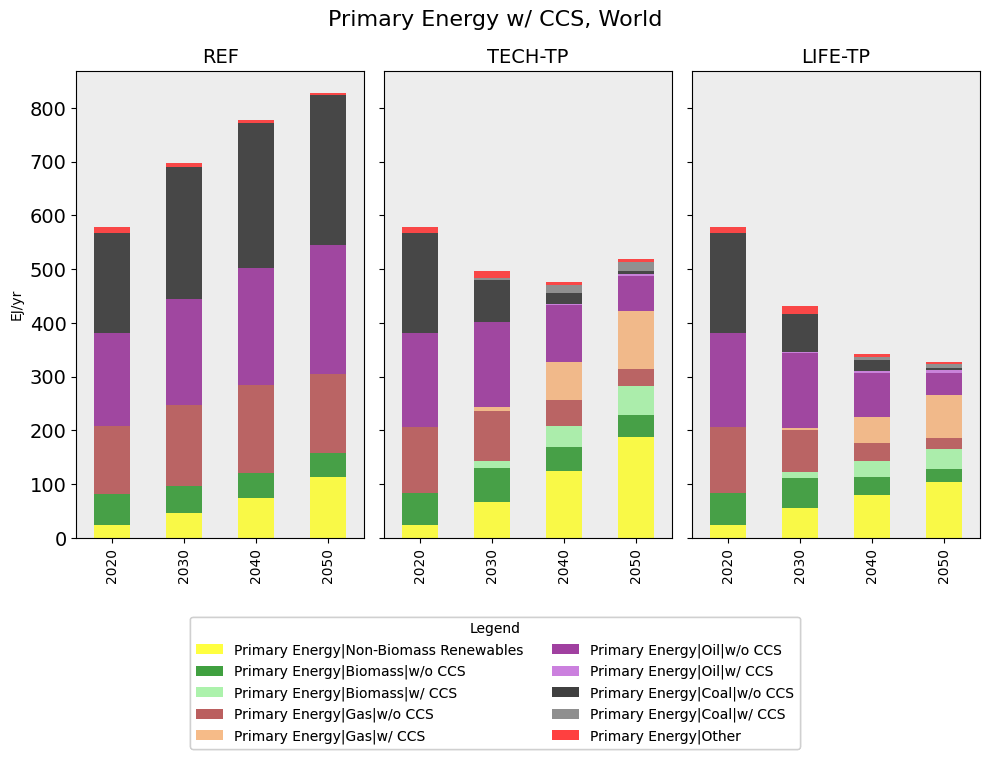

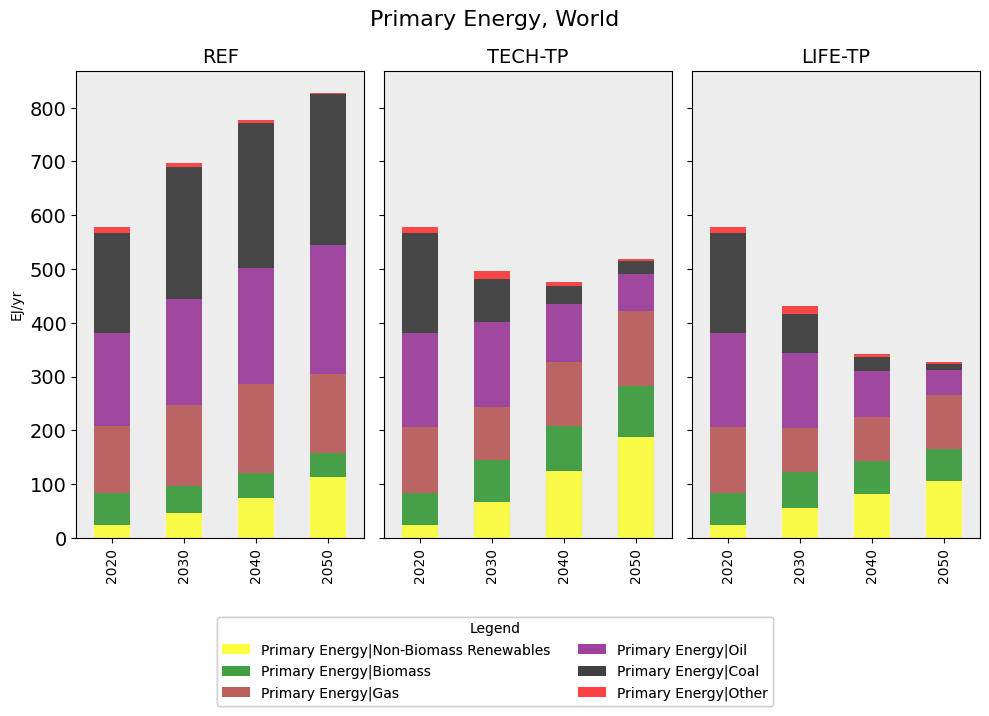

In [5]:
variable_dict ={
    'Land Cover':[[
        "Land Cover|Cropland",
        "Land Cover|Pasture",
        "Land Cover|Other",
        "Land Cover|Forest and Other Natural Land",
    ], ['yellow', 'orange', 'grey', 'green']],
    'Agricultural Demand':[[
        'Agricultural Demand|Energy|Crops',
        'Agricultural Demand|Non-Energy|Crops|Feed',
        'Agricultural Demand|Non-Energy|Crops|Food',
        'Agricultural Demand|Non-Energy|Crops|Other',
        'Agricultural Demand|Non-Energy|Livestock',
    ], ['red', 'yellow', 'green', 'orange', 'purple']],
    'Terrestrial Biodiversity Loss':[[
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
        'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
        'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
        'Terrestrial Biodiversity|MSA Loss|Encroachment',
        'Terrestrial Biodiversity|MSA Loss|Fragmentation',
        'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
    ], ['blue', 'red', 'purple', 'yellow', 'green', 'grey']],
    'Primary Energy w/ CCS':[[
        'Primary Energy|Non-Biomass Renewables',
        'Primary Energy|Biomass|w/o CCS',
        'Primary Energy|Biomass|w/ CCS',
        'Primary Energy|Gas|w/o CCS',
        'Primary Energy|Gas|w/ CCS',
        'Primary Energy|Oil|w/o CCS',
        'Primary Energy|Oil|w/ CCS',
        'Primary Energy|Coal|w/o CCS',
        'Primary Energy|Coal|w/ CCS',
        'Primary Energy|Other',
    ], ['yellow', 'green', 'lightgreen', 'brown', 'sandybrown', 'purple', 'mediumorchid', 'black', 'dimgrey', 'red', ]],
    'Primary Energy':[[
        'Primary Energy|Non-Biomass Renewables',
        'Primary Energy|Biomass',
        'Primary Energy|Gas',
        'Primary Energy|Oil',
        'Primary Energy|Coal',
        'Primary Energy|Other',
    ], ['yellow', 'green', 'brown', 'purple', 'black', 'red']]
}

for variable in variable_dict.keys():
    print(variable)
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_results.filter(variable=variable_dict[variable][0], year=[2020, 2030, 2040, 2050], region='World')
    
    # Define the color palette for scenarios
    colors = variable_dict[variable][1]
    cmap = ListedColormap(colors, name='custom_cmap')

    unique_regions = geo_data.region
    
    # Iterate through each region and plot in respective subplot
    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

    for idx, scenario in enumerate(['REF', 'TECH-TP', 'LIFE-TP', ]):      
        ax = axes[idx]  # Select the current subplot
        
        region_data = geo_data.filter(scenario=scenario)  # Filter data for the current region
        
        # Plot lineplots for each region
        region_data.plot.bar(stacked=True, 
                            bars_order=variable_dict[variable][0], 
                            cmap=cmap, 
                            alpha=0.7, 
                            ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_xlabel('', fontsize=1)
        ax.set_title(f"{scenario}", fontsize=14)  # Set the title to the region
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)
        ax.legend().set_visible(False)


        fig.suptitle(f"{variable}, World", fontsize=16)
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", title="Legend", bbox_to_anchor=(0.5, -0.02), ncol=2)

        plt.tight_layout()  # Adjust subplots to prevent overlap

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')

        root_variable = variable.split("|")[0].replace(" ", "_")
        variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
        plt.savefig(f"../../../plots/TOD/systems/{variable_name}_World.png", bbox_inches='tight')
        # plt.close()